In [28]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your CSV file
# Assuming FINAL_DATASET.csv is directly in your Google Drive's root, or adjust path accordingly
file_path = '/content/drive/MyDrive/FINAL_DATASET.csv'

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print('Dataset loaded successfully!')
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it exists in your Google Drive and the path is correct.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3205202972.py:13: DtypeWarning: Columns (76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset loaded successfully!
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2015        3      8           3          1  2015-08-03                WN   
1  2015        3      8           3          1  2015-08-03                WN   
2  2015        3      8           3          1  2015-08-03                WN   
3  2015        3      8           3          1  2015-08-03                WN   
4  2015        3      8           3          1  2015-08-03                WN   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     19393                          WN      N7743B  ...   
1                     19393                          WN      N525SW  ...   
2                     19393                          WN      N528SW  ...   
3                     19393                          WN      N523SW  ...   
4                     19393                          WN      N515SW  ...   

   tavg  tmin  tmax  prcp snow wd

In [29]:
df['weatherCancellation'] = (df['Cancelled'] == 1) & (df['CancellationCode'] == 'B')
print(df[['Cancelled', 'CancellationCode', 'weatherCancellation']].head())
print(df['weatherCancellation'].value_counts())

   Cancelled CancellationCode  weatherCancellation
0        0.0              NaN                False
1        0.0              NaN                False
2        0.0              NaN                False
3        0.0              NaN                False
4        0.0              NaN                False
weatherCancellation
False    4475351
True       26722
Name: count, dtype: int64


In [30]:
print(f"Number of NaN values in 'WeatherDelay': {df['WeatherDelay'].isnull().sum()}")
overall_delay_nan_weather_delay = df[(df['DepDelay']>0) & (df['WeatherDelay'].isna())].shape[0]
print(f"Number of rows with overall delay (ArrDelay not NaN) and NaN in WeatherDelay: {overall_delay_nan_weather_delay}")
rows_to_drop = df[(df['WeatherDelay'].isna()) & (df['DepDelay'] > 0)]

# Count the number of rows to be dropped
num_removed = len(rows_to_drop)

# Drop these rows from the DataFrame
df = df.drop(rows_to_drop.index)

print(f"Removed {num_removed} rows where 'WeatherDelay' was NaN and 'DepDelay' > 0.")

Number of NaN values in 'WeatherDelay': 3655105
Number of rows with overall delay (ArrDelay not NaN) and NaN in WeatherDelay: 1281688
Removed 1281688 rows where 'WeatherDelay' was NaN and 'DepDelay' > 0.


In [31]:
print(f"Number of NaN values in 'WeatherDelay' before imputation: {df['WeatherDelay'].isnull().sum()}")

df['WeatherDelay'] = df['WeatherDelay'].fillna(0)

print(f"Number of NaN values in 'WeatherDelay' after imputation: {df['WeatherDelay'].isnull().sum()}")

Number of NaN values in 'WeatherDelay' before imputation: 2373417
Number of NaN values in 'WeatherDelay' after imputation: 0


In [32]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,weatherCancellation
1,2015,3,8,3,1,2015-08-03,WN,19393,WN,N525SW,...,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN,False
2,2015,3,8,3,1,2015-08-03,WN,19393,WN,N528SW,...,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN,False
3,2015,3,8,3,1,2015-08-03,WN,19393,WN,N523SW,...,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN,False
4,2015,3,8,3,1,2015-08-03,WN,19393,WN,N515SW,...,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN,False
5,2015,3,8,3,1,2015-08-03,WN,19393,WN,N367SW,...,21.7,34.4,0.0,0.0,NaN,16.9,NaN,1010.1,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502064,2025,3,7,30,3,2025-07-30,WN,19393,WN,N8573Z,...,21.1,38.3,0.0,0.0,NaN,11.2,NaN,1015.2,NaN,False
4502067,2025,3,7,30,3,2025-07-30,WN,19393,WN,N7728D,...,21.1,38.3,0.0,0.0,NaN,11.2,NaN,1015.2,NaN,False
4502069,2025,3,7,30,3,2025-07-30,WN,19393,WN,N567WN,...,21.1,38.3,0.0,0.0,NaN,11.2,NaN,1015.2,NaN,False
4502070,2025,3,7,30,3,2025-07-30,WN,19393,WN,N966WN,...,21.1,38.3,0.0,0.0,NaN,11.2,NaN,1015.2,NaN,False


I will now very my method of finding max delay for each month

In [33]:
max_depdelay_per_month = df.groupby('Month')['WeatherDelay'].max()
print("Maximum Weather Delay per Month:")
print(max_depdelay_per_month)



Maximum Weather Delay per Month:
Month
1     726.0
2     370.0
3     368.0
4     616.0
5     552.0
6     394.0
7     550.0
8     429.0
9     457.0
10    478.0
11    265.0
12    548.0
Name: WeatherDelay, dtype: float64


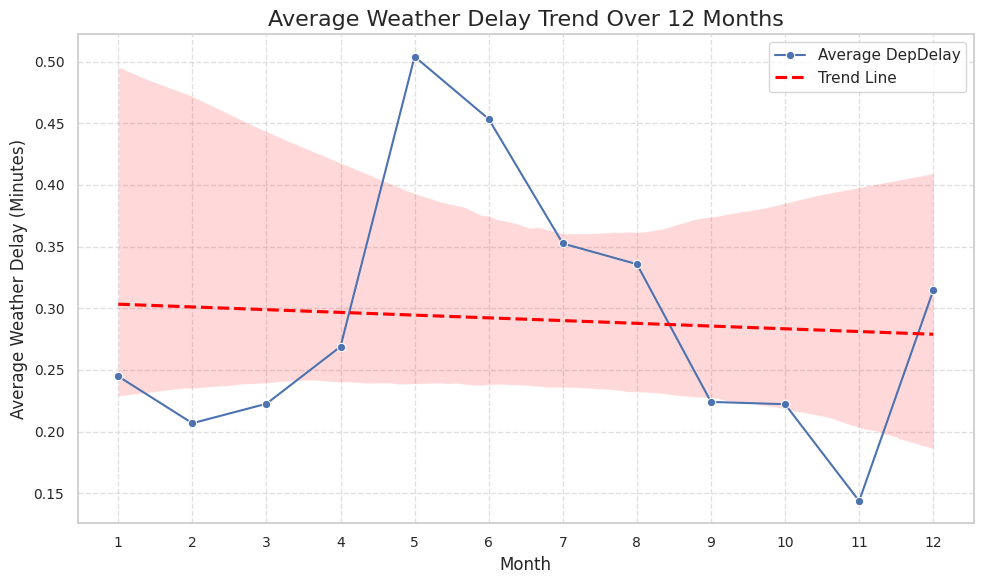

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average departure delay per month
avg_depdelay_per_month = df.groupby('Month')['WeatherDelay'].mean().reset_index()

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create the line plot with a trend line
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Month', y='WeatherDelay', data=avg_depdelay_per_month, marker='o', label='Average DepDelay')
sns.regplot(x='Month', y='WeatherDelay', data=avg_depdelay_per_month, scatter=False, color='red', line_kws={'linestyle':'--'}, ax=ax, label='Trend Line')

# Add title and labels
plt.title('Average Weather Delay Trend Over 12 Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Weather Delay (Minutes)', fontsize=12)

# Customize x-axis ticks to show all 12 months
plt.xticks(range(1, 13), fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

was thinking of having an approach where i have a max weathater delay calulated by month ajd maxing the index subjeftive by month, but that may make the model inconsistent and biased. a better approach would be to make the month a feature. different airports are diferently equipped to handle the same weather conditidions, maybe it should b e geographically based?

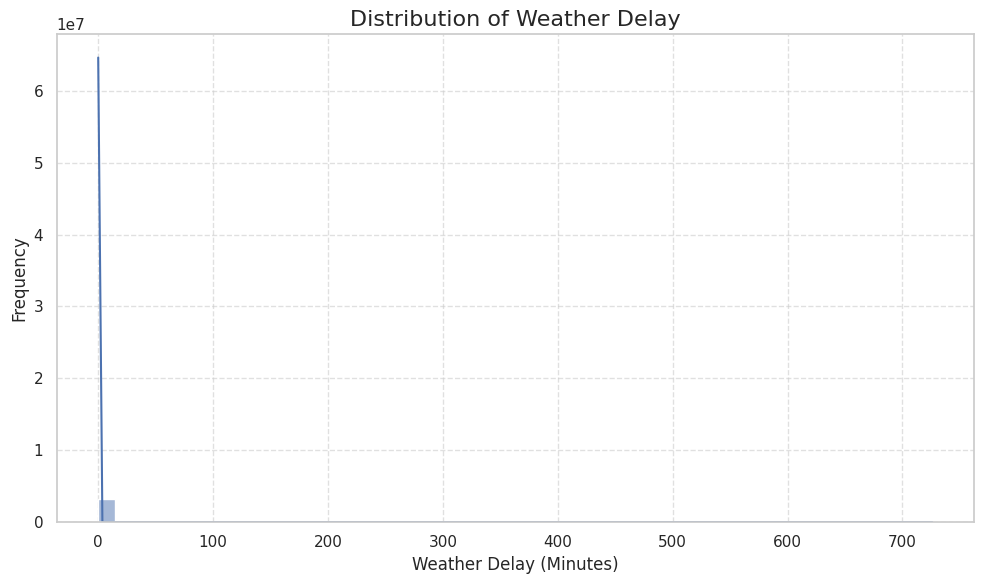

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['WeatherDelay'], bins=50, kde=True)
plt.title('Distribution of Weather Delay', fontsize=16)
plt.xlabel('Weather Delay (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [36]:
import pandas as pd
import numpy as np

# 1. Count values < 0
count_less_than_zero = (df['WeatherDelay'] < 0).sum()

# 2. Count values == 0
count_exactly_zero = (df['WeatherDelay'] == 0).sum()

# 3. Create bins for values > 0
df_positive_delays = df[df['WeatherDelay'] > 0].copy()

positive_delay_counts = pd.Series(dtype=int)

if not df_positive_delays.empty:
    max_positive_delay = df_positive_delays['WeatherDelay'].max()

    # Define bin edges for pd.cut: (0, 50], (50, 100], etc.
    positive_bin_edges = [0]
    current_upper = 50
    # Ensure the upper bound covers the max_delay by going slightly past it
    while current_upper <= max_positive_delay + 50:
        positive_bin_edges.append(current_upper)
        current_upper += 50
    positive_bin_edges.append(float('inf')) # Catch any values beyond the last explicit bin

    # Create labels for these bins (e.g., '1-50', '51-100', etc.)
    positive_bin_labels = []
    for i in range(len(positive_bin_edges) - 1):
        lower = positive_bin_edges[i]
        upper = positive_bin_edges[i+1]
        if upper == float('inf'):
            positive_bin_labels.append(f'> {int(lower)}')
        else:
            positive_bin_labels.append(f'{int(lower+1)}-{int(upper)}')

    # Cut the positive delays into these bins
    positive_delay_counts = pd.cut(df_positive_delays['WeatherDelay'],
                                   bins=positive_bin_edges,
                                   labels=positive_bin_labels,
                                   right=True, # (lower, upper]
                                   include_lowest=False # Already filtered for > 0
                                   ).value_counts().sort_index()

# Combine all results into a single Series in the requested order
final_distribution_dict = {'< 0': count_less_than_zero, '0': count_exactly_zero}

# Add positive delay counts, ensuring correct order if possible (pd.Series handles this during construction)
# Convert positive_delay_counts to a dictionary for easy merging
final_distribution_dict.update(positive_delay_counts.to_dict())

# Create a list of sorted keys to maintain consistent order for the final Series
# This ensures categories like '1-50', '51-100' appear sequentially
sorted_keys = ['< 0', '0'] + sorted([k for k in final_distribution_dict.keys() if k not in ['< 0', '0']],
                                    key=lambda x: int(x.split('-')[0]) if '-' in x else int(x.split(' ')[1]) if '> ' in x else 0)

weather_delay_distribution = pd.Series({k: final_distribution_dict[k] for k in sorted_keys})

print("Weather Delay Distribution (counts):")
print(weather_delay_distribution)

Weather Delay Distribution (counts):
< 0              0
0          3202628
1-50         11515
51-100        3654
101-150       1470
151-200        615
201-250        269
251-300        121
301-350         58
351-400         26
401-450         11
451-500          6
501-550          5
551-600          3
601-650          2
651-700          0
701-750          2
> 750            0
dtype: int64


In [37]:
import numpy as np

# Apply log transformation after adding 1 to handle zero values
df['logScaledWeatherDelay'] = np.log(df['WeatherDelay'] + 1)

# Display the head of the new column to verify
print(df[['WeatherDelay', 'logScaledWeatherDelay']].head())

   WeatherDelay  logScaledWeatherDelay
1           0.0                    0.0
2           0.0                    0.0
3           0.0                    0.0
4           0.0                    0.0
5           0.0                    0.0


In [38]:
# 1. Count values < 0
count_less_than_zero = (df['logScaledWeatherDelay'] < 0).sum()

# 2. Count values == 0
count_exactly_zero = (df['logScaledWeatherDelay'] == 0).sum()

# 3. Create bins for values > 0
df_positive_delays = df[df['logScaledWeatherDelay'] > 0].copy()

positive_delay_counts = pd.Series(dtype=int)

if not df_positive_delays.empty:
    max_positive_delay = df_positive_delays['logScaledWeatherDelay'].max()

    # Define bin edges for pd.cut: (0, 50], (50, 100], etc.
    positive_bin_edges = [0]
    current_upper = 50
    # Ensure the upper bound covers the max_delay by going slightly past it
    while current_upper <= max_positive_delay + 50:
        positive_bin_edges.append(current_upper)
        current_upper += 50
    positive_bin_edges.append(float('inf')) # Catch any values beyond the last explicit bin

    # Create labels for these bins (e.g., '1-50', '51-100', etc.)
    positive_bin_labels = []
    for i in range(len(positive_bin_edges) - 1):
        lower = positive_bin_edges[i]
        upper = positive_bin_edges[i+1]
        if upper == float('inf'):
            positive_bin_labels.append(f'> {int(lower)}')
        else:
            positive_bin_labels.append(f'{int(lower+1)}-{int(upper)}')

    # Cut the positive delays into these bins
    positive_delay_counts = pd.cut(df_positive_delays['logScaledWeatherDelay'],
                                   bins=positive_bin_edges,
                                   labels=positive_bin_labels,
                                   right=True, # (lower, upper]
                                   include_lowest=False # Already filtered for > 0
                                   ).value_counts().sort_index()

# Combine all results into a single Series in the requested order
final_distribution_dict = {'< 0': count_less_than_zero, '0': count_exactly_zero}

# Add positive delay counts, ensuring correct order if possible (pd.Series handles this during construction)
# Convert positive_delay_counts to a dictionary for easy merging
final_distribution_dict.update(positive_delay_counts.to_dict())

# Create a list of sorted keys to maintain consistent order for the final Series
# This ensures categories like '1-50', '51-100' appear sequentially
sorted_keys = ['< 0', '0'] + sorted([k for k in final_distribution_dict.keys() if k not in ['< 0', '0']],
                                    key=lambda x: int(x.split('-')[0]) if '-' in x else int(x.split(' ')[1]) if '> ' in x else 0)

weather_delay_distribution = pd.Series({k: final_distribution_dict[k] for k in sorted_keys})

print("Weather Delay Distribution (counts):")
print(weather_delay_distribution)

Weather Delay Distribution (counts):
< 0           0
0       3202628
1-50      17757
> 50          0
dtype: int64


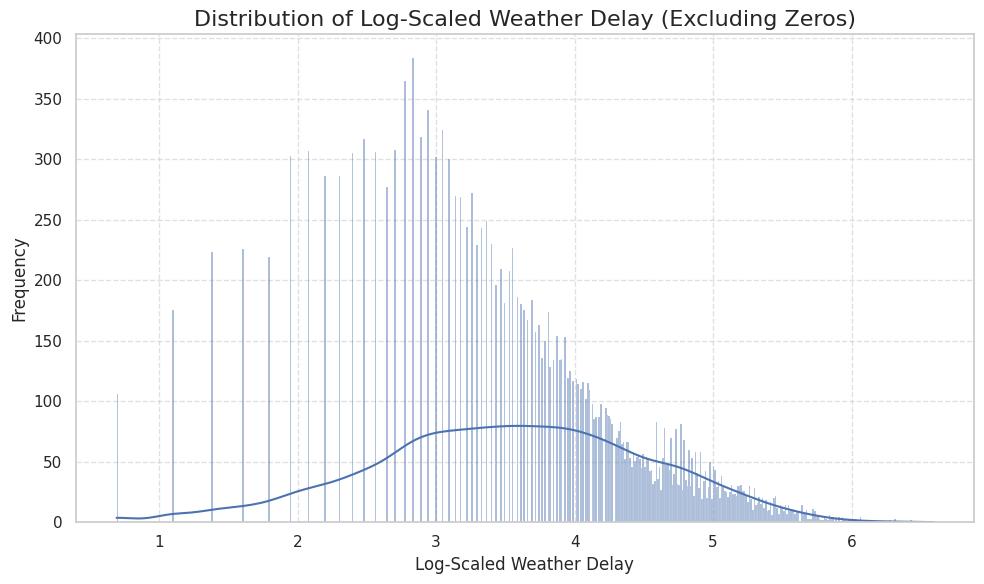

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where logScaledWeatherDelay is 0
df_positive_log_delay = df[df['logScaledWeatherDelay'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(df_positive_log_delay['logScaledWeatherDelay'], bins=500, kde=True)
plt.title('Distribution of Log-Scaled Weather Delay (Excluding Zeros)', fontsize=16)
plt.xlabel('Log-Scaled Weather Delay', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [40]:
# 1. Count values < 0
count_less_than_zero = (df['logScaledWeatherDelay'] < 0).sum()

# 2. Count values == 0
count_exactly_zero = (df['logScaledWeatherDelay'] == 0).sum()

# 3. Create bins for values > 0
df_positive_delays = df[df['logScaledWeatherDelay'] > 0].copy()

positive_delay_counts = pd.Series(dtype=int)

if not df_positive_delays.empty:
    max_positive_delay = df_positive_delays['logScaledWeatherDelay'].max()

    # Define bin edges for pd.cut: (0, 50], (50, 100], etc.
    positive_bin_edges = [0]
    current_upper = 1
    # Ensure the upper bound covers the max_delay by going slightly past it
    while current_upper <= max_positive_delay + 1:
        positive_bin_edges.append(current_upper)
        current_upper += 1
    positive_bin_edges.append(float('inf')) # Catch any values beyond the last explicit bin

    # Create labels for these bins (e.g., '1-50', '51-100', etc.)
    positive_bin_labels = []
    for i in range(len(positive_bin_edges) - 1):
        lower = positive_bin_edges[i]
        upper = positive_bin_edges[i+1]
        if upper == float('inf'):
            positive_bin_labels.append(f'> {int(lower)}')
        else:
            positive_bin_labels.append(f'{int(lower+1)}-{int(upper)}')

    # Cut the positive delays into these bins
    positive_delay_counts = pd.cut(df_positive_delays['logScaledWeatherDelay'],
                                   bins=positive_bin_edges,
                                   labels=positive_bin_labels,
                                   right=True, # (lower, upper]
                                   include_lowest=False # Already filtered for > 0
                                   ).value_counts().sort_index()

# Combine all results into a single Series in the requested order
final_distribution_dict = {'< 0': count_less_than_zero, '0': count_exactly_zero}

# Add positive delay counts, ensuring correct order if possible (pd.Series handles this during construction)
# Convert positive_delay_counts to a dictionary for easy merging
final_distribution_dict.update(positive_delay_counts.to_dict())

# Create a list of sorted keys to maintain consistent order for the final Series
# This ensures categories like '1-50', '51-100' appear sequentially
sorted_keys = ['< 0', '0'] + sorted([k for k in final_distribution_dict.keys() if k not in ['< 0', '0']],
                                    key=lambda x: int(x.split('-')[0]) if '-' in x else int(x.split(' ')[1]) if '> ' in x else 0)

weather_delay_distribution = pd.Series({k: final_distribution_dict[k] for k in sorted_keys})

print("Weather Delay Distribution (counts):")
print(weather_delay_distribution)

Weather Delay Distribution (counts):
< 0          0
0      3202628
1-1        106
2-2       1146
3-3       4102
4-4       6522
5-5       4692
6-6       1160
7-7         29
> 7          0
dtype: int64


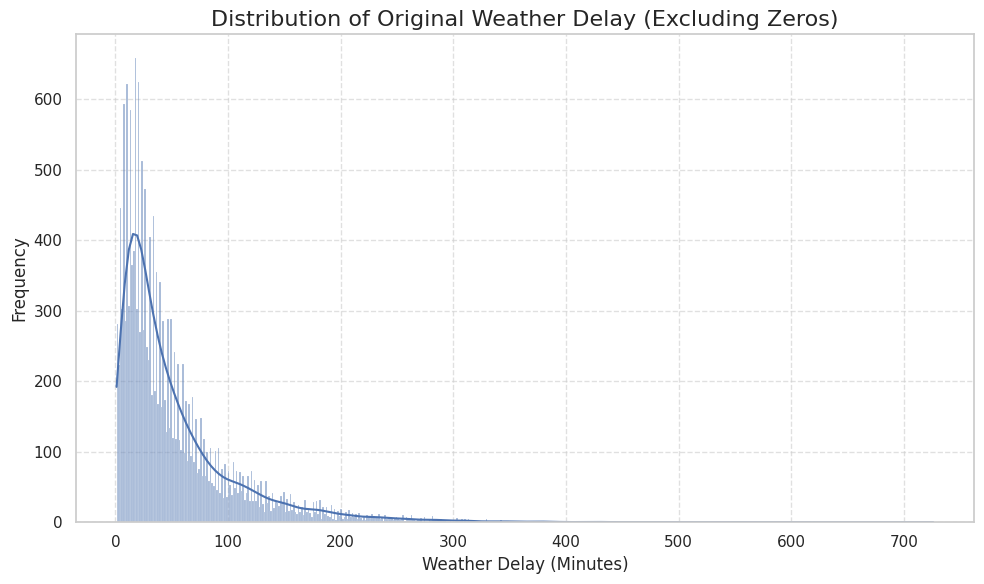

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where WeatherDelay is 0
df_positive_original_delay = df[df['WeatherDelay'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(df_positive_original_delay['WeatherDelay'], bins=500, kde=True)
plt.title('Distribution of Original Weather Delay (Excluding Zeros)', fontsize=16)
plt.xlabel('Weather Delay (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [42]:
# Find the maximum log-scaled weather delay
max_log_scaled_weather_delay = df['logScaledWeatherDelay'].max()

# Calculate weatherScore
if max_log_scaled_weather_delay > 0:
    df['weatherScore'] = (df['logScaledWeatherDelay'] / max_log_scaled_weather_delay) * 100
else:
    # If all logScaledWeatherDelay values are 0 (i.e., all original WeatherDelay were 0),
    # then all weatherScore should be 0.
    df['weatherScore'] = 0.0

# Display the head of the new column to verify
print(df[['WeatherDelay', 'logScaledWeatherDelay', 'weatherScore']].head())

   WeatherDelay  logScaledWeatherDelay  weatherScore
1           0.0                    0.0           0.0
2           0.0                    0.0           0.0
3           0.0                    0.0           0.0
4           0.0                    0.0           0.0
5           0.0                    0.0           0.0


In [43]:
# Replace weatherScore with 100 if weatherCancellation is True
df.loc[df['weatherCancellation'] == True, 'weatherScore'] = 100

# Display the head of the relevant columns to verify the change
print(df[['weatherCancellation', 'weatherScore']].head(10))

    weatherCancellation  weatherScore
1                 False           0.0
2                 False           0.0
3                 False           0.0
4                 False           0.0
5                 False           0.0
6                 False           0.0
7                 False           0.0
8                 False           0.0
9                 False           0.0
10                False           0.0


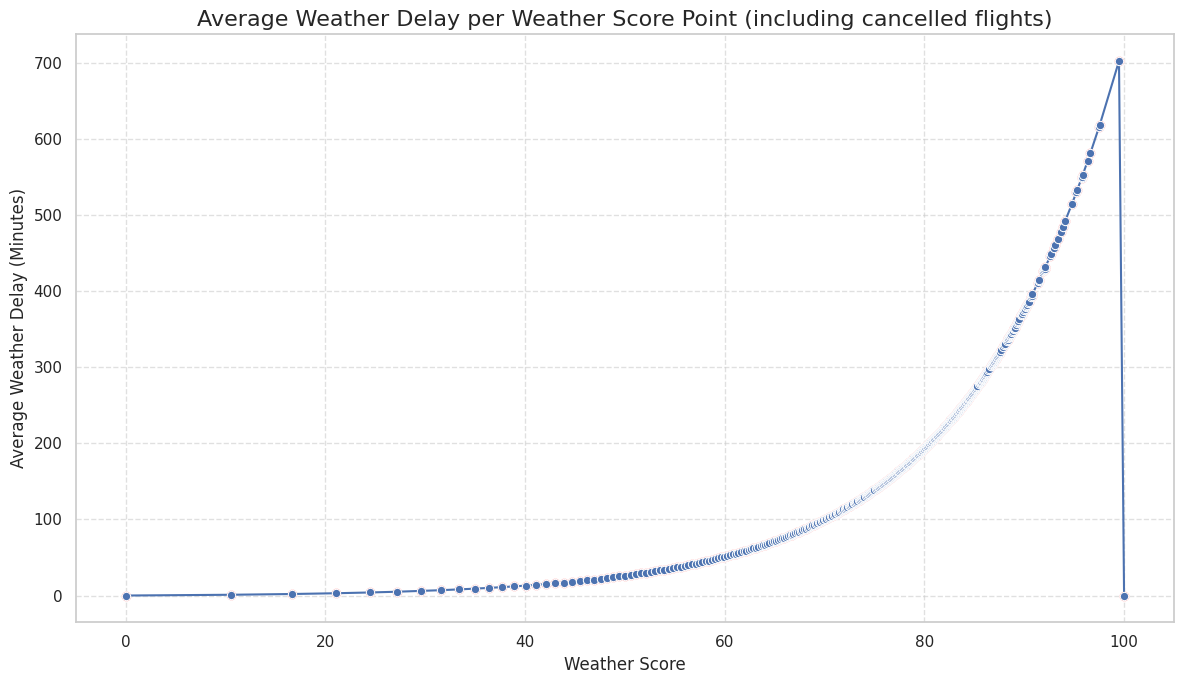

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average WeatherDelay for each individual weatherScore point
avg_weatherdelay_per_score_point = df.groupby('weatherScore')['WeatherDelay'].mean()

# Convert the Series to a DataFrame for easier plotting with seaborn
plot_data = avg_weatherdelay_per_score_point.reset_index()
plot_data.columns = ['weatherScore', 'Average Weather Delay']

plt.figure(figsize=(12, 7))
sns.lineplot(x='weatherScore', y='Average Weather Delay', data=plot_data, marker='o')
sns.scatterplot(x='weatherScore', y='Average Weather Delay', data=plot_data, color='red', s=50)

plt.title('Average Weather Delay per Weather Score Point (including cancelled flights)', fontsize=16)
plt.xlabel('Weather Score', fontsize=12)
plt.ylabel('Average Weather Delay (Minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

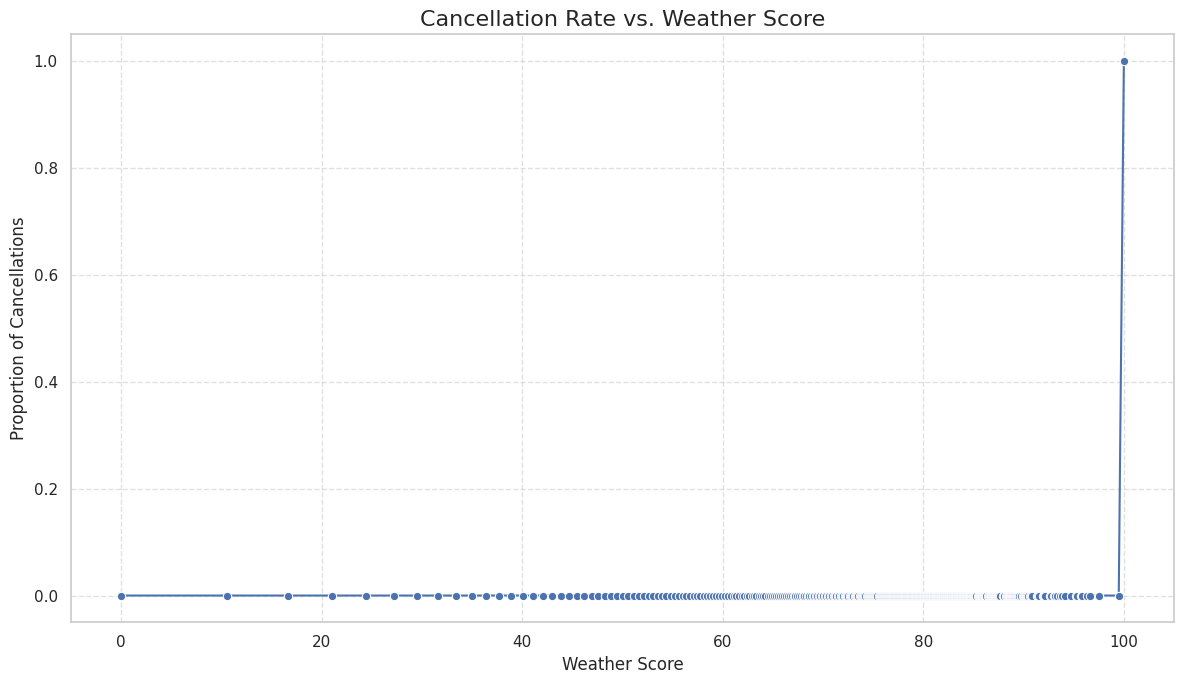

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the proportion of cancellations for each weatherScore
cancellation_rate_per_score = df.groupby('weatherScore')['weatherCancellation'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x='weatherScore', y='weatherCancellation', data=cancellation_rate_per_score, marker='o')

plt.title('Cancellation Rate vs. Weather Score', fontsize=16)
plt.xlabel('Weather Score', fontsize=12)
plt.ylabel('Proportion of Cancellations', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [46]:
# Find the maximum weatherScore where the cancellation rate is not 100%
# This will be the score just before the definitive spike at 100
max_score_before_spike = cancellation_rate_per_score[cancellation_rate_per_score['weatherScore'] < 100]['weatherScore'].max()

print(f"The highest weatherScore before the cancellation rate spikes at 100 is: {max_score_before_spike}")

The highest weatherScore before the cancellation rate spikes at 100 is: 99.49051509624037


In [47]:
# Summarizing the threshold for weather cancellations

# We previously confirmed that all weather-cancelled flights have a weatherScore of 100.
# This was done by: df.loc[df['weatherCancellation'] == True, 'weatherScore'] = 100

# Let's confirm the count and the average delay at this score one more time:
weather_cancelled_count = df[df['weatherCancellation'] == True].shape[0]
average_delay_for_cancelled_score = df[df['weatherScore'] == 100]['WeatherDelay'].mean()

print(f"Number of flights with weatherCancellation=True: {weather_cancelled_count}")
print(f"Average WeatherDelay for flights with weatherScore=100: {average_delay_for_cancelled_score:.2f} minutes")
print("\nConclusion: A weatherScore of 100 directly indicates a weather-related cancellation.")

Number of flights with weatherCancellation=True: 26536
Average WeatherDelay for flights with weatherScore=100: 0.03 minutes

Conclusion: A weatherScore of 100 directly indicates a weather-related cancellation.


In [48]:
weather_cancelled_flights = df[df['weatherCancellation'] == True]

# Check if all weather-cancelled flights have a weatherScore of 100
all_100_score = (weather_cancelled_flights['weatherScore'] == 100).all()

# Print the result
if all_100_score:
    print("All weather-cancelled flights have a weatherScore of 100.")
else:
    print("Not all weather-cancelled flights have a weatherScore of 100.")

# Optionally, print a count or head of such flights to verify
print(f"Number of weather-cancelled flights: {len(weather_cancelled_flights)}")
if not all_100_score and not weather_cancelled_flights.empty:
    print("Weather-cancelled flights with weatherScore not equal to 100:")
    print(weather_cancelled_flights[weather_cancelled_flights['weatherScore'] != 100][['weatherCancellation', 'weatherScore']].head())

All weather-cancelled flights have a weatherScore of 100.
Number of weather-cancelled flights: 26536


In [49]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,prcp,snow,wdir,wspd,wpgt,pres,tsun,weatherCancellation,logScaledWeatherDelay,weatherScore
1,2015,3,8,3,1,2015-08-03,WN,19393,WN,N525SW,...,0.0,0.0,NaN,16.9,NaN,1010.1,NaN,False,0.0,0.0
2,2015,3,8,3,1,2015-08-03,WN,19393,WN,N528SW,...,0.0,0.0,NaN,16.9,NaN,1010.1,NaN,False,0.0,0.0
3,2015,3,8,3,1,2015-08-03,WN,19393,WN,N523SW,...,0.0,0.0,NaN,16.9,NaN,1010.1,NaN,False,0.0,0.0
4,2015,3,8,3,1,2015-08-03,WN,19393,WN,N515SW,...,0.0,0.0,NaN,16.9,NaN,1010.1,NaN,False,0.0,0.0
5,2015,3,8,3,1,2015-08-03,WN,19393,WN,N367SW,...,0.0,0.0,NaN,16.9,NaN,1010.1,NaN,False,0.0,0.0


In [50]:
def lookup_flight_by_index(index):
    """
    Looks up all data for a flight given its index in the DataFrame.

    Args:
        index (int): The index of the flight in the DataFrame.

    Returns:
        None: Prints the flight data directly.
    """
    if index in df.index:
        flight_data = df.loc[index]
        print(f"\n--- Flight Data for Index: {index} ---")
        for column, value in flight_data.items():
            print(f"{column}: {value}")
        print("-------------------------------------")
    else:
        print(f"Error: Index {index} not found in the DataFrame.")

# --- Example Usage ---
# To use this, you need to know a valid index from your DataFrame.
# For example, let's pick a random index:
random_index = df.sample(56).index[0]
lookup_flight_by_index(random_index)

# You can also try a specific index, e.g., the first row if it exists:
# lookup_flight_by_index(1) # Assuming index 1 exists after data loading and cleaning


--- Flight Data for Index: 3123410 ---
Year: 2022
Quarter: 2
Month: 4
DayofMonth: 14
DayOfWeek: 4
FlightDate: 2022-04-14
Reporting_Airline: WN
DOT_ID_Reporting_Airline: 19393
IATA_CODE_Reporting_Airline: WN
Tail_Number: N744SW
Flight_Number_Reporting_Airline: 2261.0
OriginAirportID: 10423
OriginAirportSeqID: 1042302
OriginCityMarketID: 30423
Origin: AUS
OriginCityName: Austin, TX
OriginState: TX
OriginStateFips: 48
OriginStateName: Texas
OriginWac: 74
DestAirportID: 14831
DestAirportSeqID: 1483106
DestCityMarketID: 32457
Dest: SJC
DestCityName: San Jose, CA
DestState: CA
DestStateFips: 6
DestStateName: California
DestWac: 91
CRSDepTime: 1935
DepTime: 1943.0
DepDelay: 8.0
DepDelayMinutes: 8.0
DepDel15: 0.0
DepartureDelayGroups: 0.0
DepTimeBlk: 1900-1959
TaxiOut: 13.0
WheelsOff: 1956.0
WheelsOn: 2138.0
TaxiIn: 15.0
CRSArrTime: 2120
ArrTime: 2153.0
ArrDelay: 33.0
ArrDelayMinutes: 33.0
ArrDel15: 1.0
ArrivalDelayGroups: 2.0
ArrTimeBlk: 2100-2159
Cancelled: 0.0
CancellationCode: nan
Diverte

In [51]:
for feature in df.columns:
    print(f"Feature: {feature}")



Feature: Year
Feature: Quarter
Feature: Month
Feature: DayofMonth
Feature: DayOfWeek
Feature: FlightDate
Feature: Reporting_Airline
Feature: DOT_ID_Reporting_Airline
Feature: IATA_CODE_Reporting_Airline
Feature: Tail_Number
Feature: Flight_Number_Reporting_Airline
Feature: OriginAirportID
Feature: OriginAirportSeqID
Feature: OriginCityMarketID
Feature: Origin
Feature: OriginCityName
Feature: OriginState
Feature: OriginStateFips
Feature: OriginStateName
Feature: OriginWac
Feature: DestAirportID
Feature: DestAirportSeqID
Feature: DestCityMarketID
Feature: Dest
Feature: DestCityName
Feature: DestState
Feature: DestStateFips
Feature: DestStateName
Feature: DestWac
Feature: CRSDepTime
Feature: DepTime
Feature: DepDelay
Feature: DepDelayMinutes
Feature: DepDel15
Feature: DepartureDelayGroups
Feature: DepTimeBlk
Feature: TaxiOut
Feature: WheelsOff
Feature: WheelsOn
Feature: TaxiIn
Feature: CRSArrTime
Feature: ArrTime
Feature: ArrDelay
Feature: ArrDelayMinutes
Feature: ArrDel15
Feature: Arriva

In [52]:
columns_to_drop_text = """year, quarter, dayofmonth, dayofweek, flightdate, Reporting_Airline, DOT_ID_Reporting_Airline, IATA_CODE_Reporting_Airline, Tail_Number,  OriginAirportID, OriginAirportSeqID, OriginCityMarketID,  OriginCityName, OriginState, OriginStateFips, OriginWac, DestAirportID
DestAirportSeqID
DestCityMarketID
DestCityName
DestState
DestStateFips

DestWac

DepTime
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
DistanceGroup
CarrierDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn

for this part just ignore parts after colon
Div1TotalGTime
Div1LongestGTime: nan
Div1WheelsOff: nan
Div1TailNum: nan
Div2Airport: nan
Div2AirportID: nan
Div2AirportSeqID: nan
Div2WheelsOn: nan
Div2TotalGTime: nan
Div2LongestGTime: nan
Div2WheelsOff: nan
Div2TailNum: nan
Div3Airport: nan
Div3AirportID: nan
Div3AirportSeqID: nan
Div3WheelsOn: nan
Div3TotalGTime: nan
Div3LongestGTime: nan
Div3WheelsOff: nan
Div3TailNum: nan
Div4Airport: nan
Div4AirportID: nan
Div4AirportSeqID: nan
Div4WheelsOn: nan
Div4TotalGTime: nan
Div4LongestGTime: nan
Div4WheelsOff: nan
Div4TailNum: nan
Div5Airport: nan
Div5AirportID: nan
Div5AirportSeqID: nan
Div5WheelsOn: nan
Div5TotalGTime: nan
Div5LongestGTime: nan
Div5WheelsOff: nan
Div5TailNum: nan
Unnamed: 109: nan"""

# Split the text by newline and comma, then clean each item
columns_list = []
for item in columns_to_drop_text.splitlines():
    if item.strip() and not item.startswith('for this part just ignore parts after colon'):
        # Remove parts after colon and strip whitespace, then split by comma
        parts = item.split(':', 1)[0].strip().split(',')
        for part in parts:
            cleaned_part = part.strip()
            if cleaned_part:
                columns_list.append(cleaned_part)

# Remove duplicates and ensure all columns exist in the DataFrame
columns_to_drop = [col for col in set(columns_list) if col in df.columns]

print(f"Attempting to drop {len(columns_to_drop)} columns: {columns_to_drop}")

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop, errors='ignore')

print("Columns remaining in DataFrame after dropping:")
for feature in df.columns:
    print(f"- {feature}")

Attempting to drop 91 columns: ['DepartureDelayGroups', 'Div1TotalGTime', 'DestCityMarketID', 'ActualElapsedTime', 'FirstDepTime', 'Div3TotalGTime', 'Tail_Number', 'Div3AirportID', 'ArrTimeBlk', 'DivAirportLandings', 'Div1WheelsOn', 'OriginAirportSeqID', 'Diverted', 'Div4AirportSeqID', 'Div2AirportSeqID', 'Div4TailNum', 'Reporting_Airline', 'Div1LongestGTime', 'ArrDelay', 'SecurityDelay', 'DestAirportID', 'OriginWac', 'Div5WheelsOff', 'DestState', 'DivActualElapsedTime', 'DepTimeBlk', 'DOT_ID_Reporting_Airline', 'Div1WheelsOff', 'DepDel15', 'Div3WheelsOn', 'DepTime', 'DivReachedDest', 'Div1AirportSeqID', 'AirTime', 'Div5WheelsOn', 'LateAircraftDelay', 'DestWac', 'Div1Airport', 'WheelsOff', 'DestStateFips', 'Div2AirportID', 'ArrivalDelayGroups', 'Div1TailNum', 'TotalAddGTime', 'DivArrDelay', 'Div3AirportSeqID', 'DivDistance', 'Div3LongestGTime', 'DistanceGroup', 'TaxiOut', 'Div3Airport', 'Div3WheelsOff', 'Div5TotalGTime', 'ArrDelayMinutes', 'WheelsOn', 'DepDelayMinutes', 'ArrTime', 'Des

In [53]:
columns_to_drop_text = """
- FlightDate
- Unnamed: 109
"""

# Split the text by newline and filter out empty lines
raw_columns = [line.strip() for line in columns_to_drop_text.split('\n') if line.strip()]

# Clean up each column name
cleaned_columns = []
for col_name in raw_columns:
    # Remove leading '-' and any other extraneous characters
    cleaned_name = col_name.replace('-', '').strip()
    # For 'Unnamed: 109', take only 'Unnamed: 109'
    if 'Unnamed: 109' in cleaned_name:
        cleaned_name = 'Unnamed: 109'
    if cleaned_name:
        cleaned_columns.append(cleaned_name)

# Remove duplicates and ensure all columns exist in the DataFrame
columns_to_drop = [col for col in set(cleaned_columns) if col in df.columns]

print(f"Attempting to drop {len(columns_to_drop)} columns: {columns_to_drop}")

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop, errors='ignore')

print("Columns remaining in DataFrame after dropping:")
for feature in df.columns:
    print(f"- {feature}")

Attempting to drop 2 columns: ['FlightDate', 'Unnamed: 109']
Columns remaining in DataFrame after dropping:
- Year
- Quarter
- Month
- DayofMonth
- DayOfWeek
- Flight_Number_Reporting_Airline
- Origin
- OriginStateName
- Dest
- DestStateName
- CRSDepTime
- DepDelay
- CRSArrTime
- Cancelled
- CancellationCode
- Distance
- WeatherDelay
- tavg
- tmin
- tmax
- prcp
- snow
- wdir
- wspd
- wpgt
- pres
- tsun
- weatherCancellation
- logScaledWeatherDelay
- weatherScore


In [54]:
# Define the path for the exported CSV file in Google Drive
output_file_path = '/content/drive/MyDrive/processed_flight_data.csv'

# Export the DataFrame to CSV
df.to_csv(output_file_path, index=False)

print(f"DataFrame exported successfully to {output_file_path}")

DataFrame exported successfully to /content/drive/MyDrive/processed_flight_data.csv
